## Домашняя работа по теме "Основы обучения нейронных сетей"

__Домашнее задание__

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность.
2. Проведите анализ — что приводит к ухудшению точности нейронной сети?
3. Что приводит к увеличению ее точности?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler

(1797, 64)


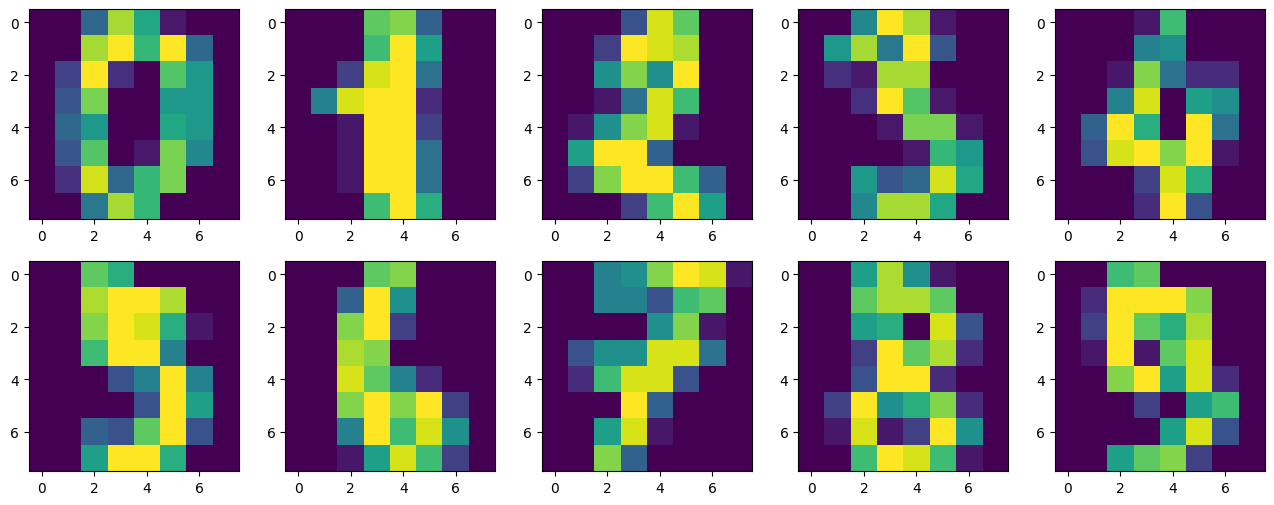

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# Подготовка тренировочных данных
X, y = load_digits(return_X_y=True)
print(X.shape) # расскоментируйте, чтобы размер данных

# репрезентация данных
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8, 8]))

In [3]:
def to_one_hot(Y):
    n_col = np.max(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1
    return binarized

In [4]:
# формирование входных данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# формирование выходных данных(результатов)
y = y.flatten()
y = to_one_hot(y)
display(y, y.shape)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

(1797, 10)

In [5]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

Опишем функцию активации нейрона и её производную

In [6]:
# вычисление сигмоид функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# вычисление производной от сигмоид функции
def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
def train_model(neuron_numb=20, learning_rate=0.1, num_epochs=100):

    # присваивание случайных весов
    np.random.seed(1)
    w0 = np.random.random((64, neuron_numb))  # для входного слоя    - 64 входа, neuron_numb выходов
    w1 = np.random.random((neuron_numb, 10))  # для внутреннего слоя - neuron_numb входов, 10 выходов

    # скорость обучения (learning rate)

    # количество итераций (num_epochs)

    # массив для ошибок, чтобы потом построить график
    errors = []
    metrics = []

    # процесс обучения
    for i in range(num_epochs):

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение (back propagation)
        # с использованием градиентного спуска
        layer2_error = layer2 - y_train  # производная функции потерь
        layer2_grad = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_grad.dot(w1.T)
        # sigmoid_deriv - Для классификации
        # relu_deriv - Для регрессии
        layer1_grad = layer1_error * sigmoid_deriv(layer1)
        
        w1 -= layer1.T.dot(layer2_grad) * learning_rate
        w0 -= layer0.T.dot(layer1_grad) * learning_rate
        
        # ошибка модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        
        # метрики качества
        preds = np.argmax(layer2, axis=1)
        labels = np.argmax(y_train, axis=1)
        accuracy = (preds == labels).sum() * 100 / len(labels)
        metrics.append(accuracy)

    return {"w0": w0,
            "w1": w1,
            "errors": errors,
            "preds": preds,
            "labels": labels,
            "metrics": metrics,
            "layer2": layer2,
            "accuracy": accuracy}

In [8]:
result = train_model(neuron_numb=20, learning_rate=0.1, num_epochs=100)

при learning_rate 0.1 accuracy на обучении = 73.82%
при learning_rate 0.05 accuracy на обучении = 86.95%
при learning_rate 0.01 accuracy на обучении = 93.52%


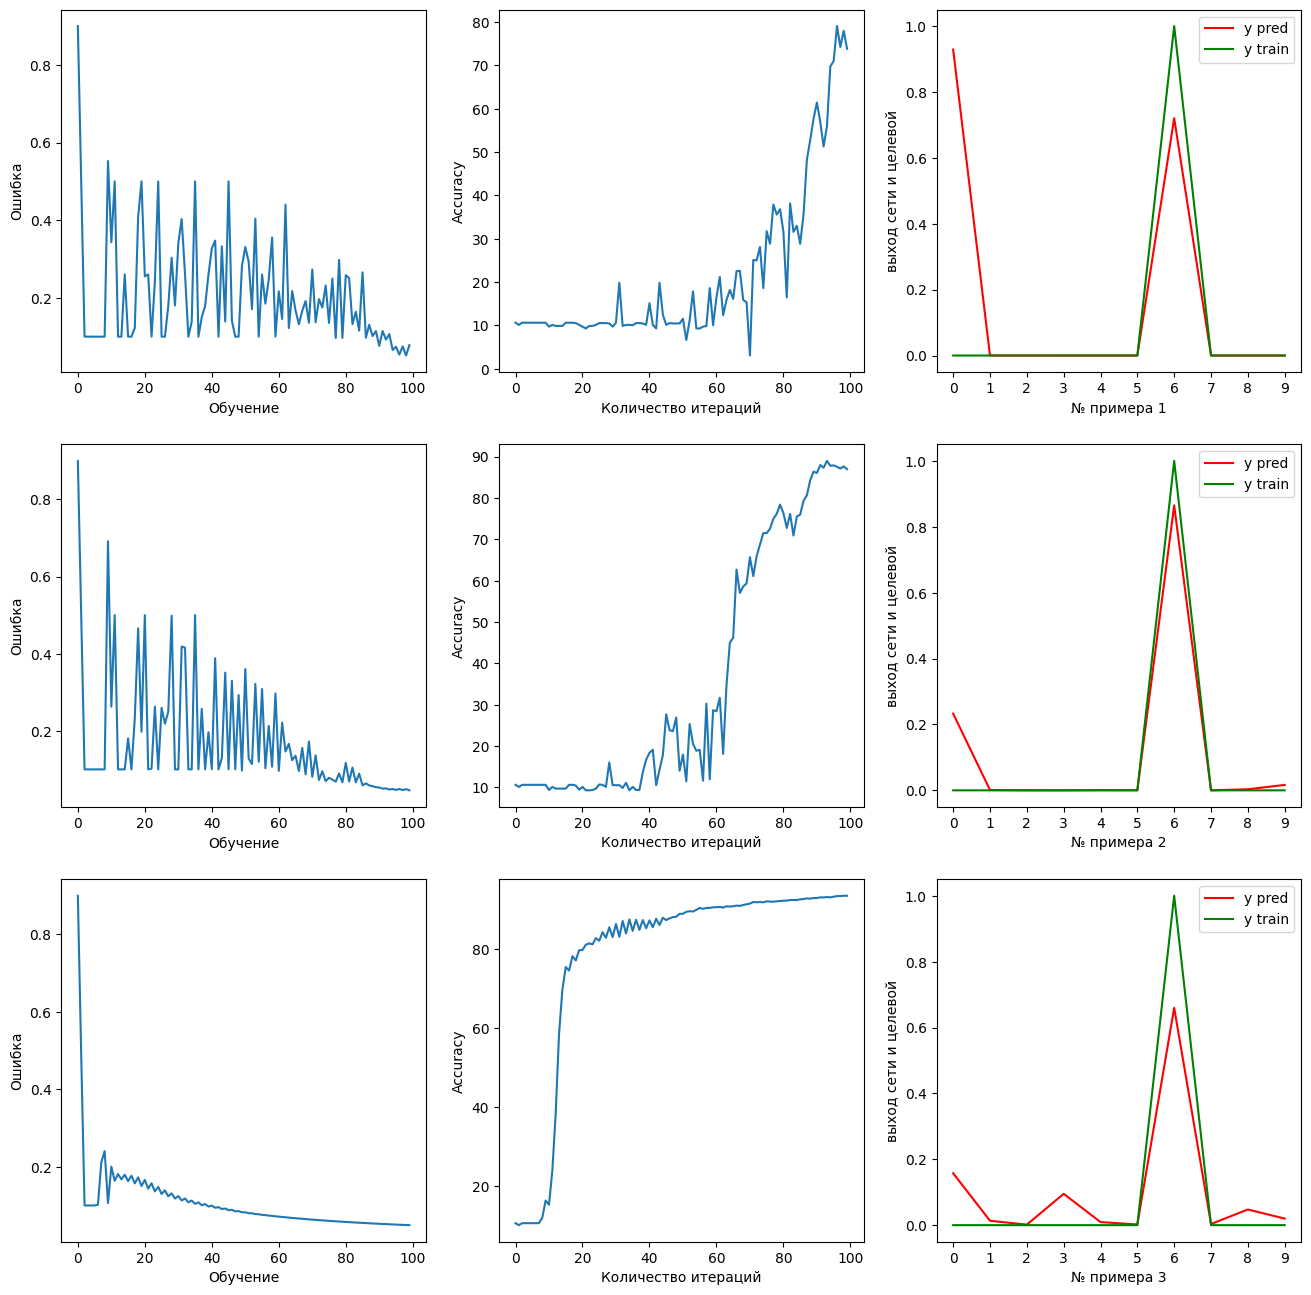

In [9]:
learning_rate = [0.1, 0.05, 0.01]
count = 0

plt.figure(figsize = (16, 16))
for num, i in enumerate(learning_rate):

    count += 1
    result = train_model(neuron_numb=20, learning_rate=i, num_epochs=100)
    plt.subplot(3, 3, count)
    plt.plot(result['errors'])
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')

    count += 1
    plt.subplot(3,3,count)
    plt.plot(result['metrics'])
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')

    count += 1
    N = 10
    label = 2
    plt.subplot(3,3,count)
    plt.plot(result['layer2'][:N, label], 'r', label='y pred')
    plt.plot(y_train[:N, label],'g', label='y train')
    plt.xticks(np.arange(N))
    plt.xlabel(f'№ примера {num+1}')
    plt.ylabel('выход сети и целевой')
    plt.legend()
            
    print(f"при learning_rate {i} accuracy на обучении = {round(result['accuracy'], 2)}%")

plt.show()

При уменьшении параметра learning_rate ошибка значительно сокращается и повышается точность. Лучше всего показатели при learning_rate = 0.01

при neuron_numb 5 accuracy на обучении = 43.81%
при neuron_numb 20 accuracy на обучении = 73.82%
при neuron_numb 60 accuracy на обучении = 88.94%


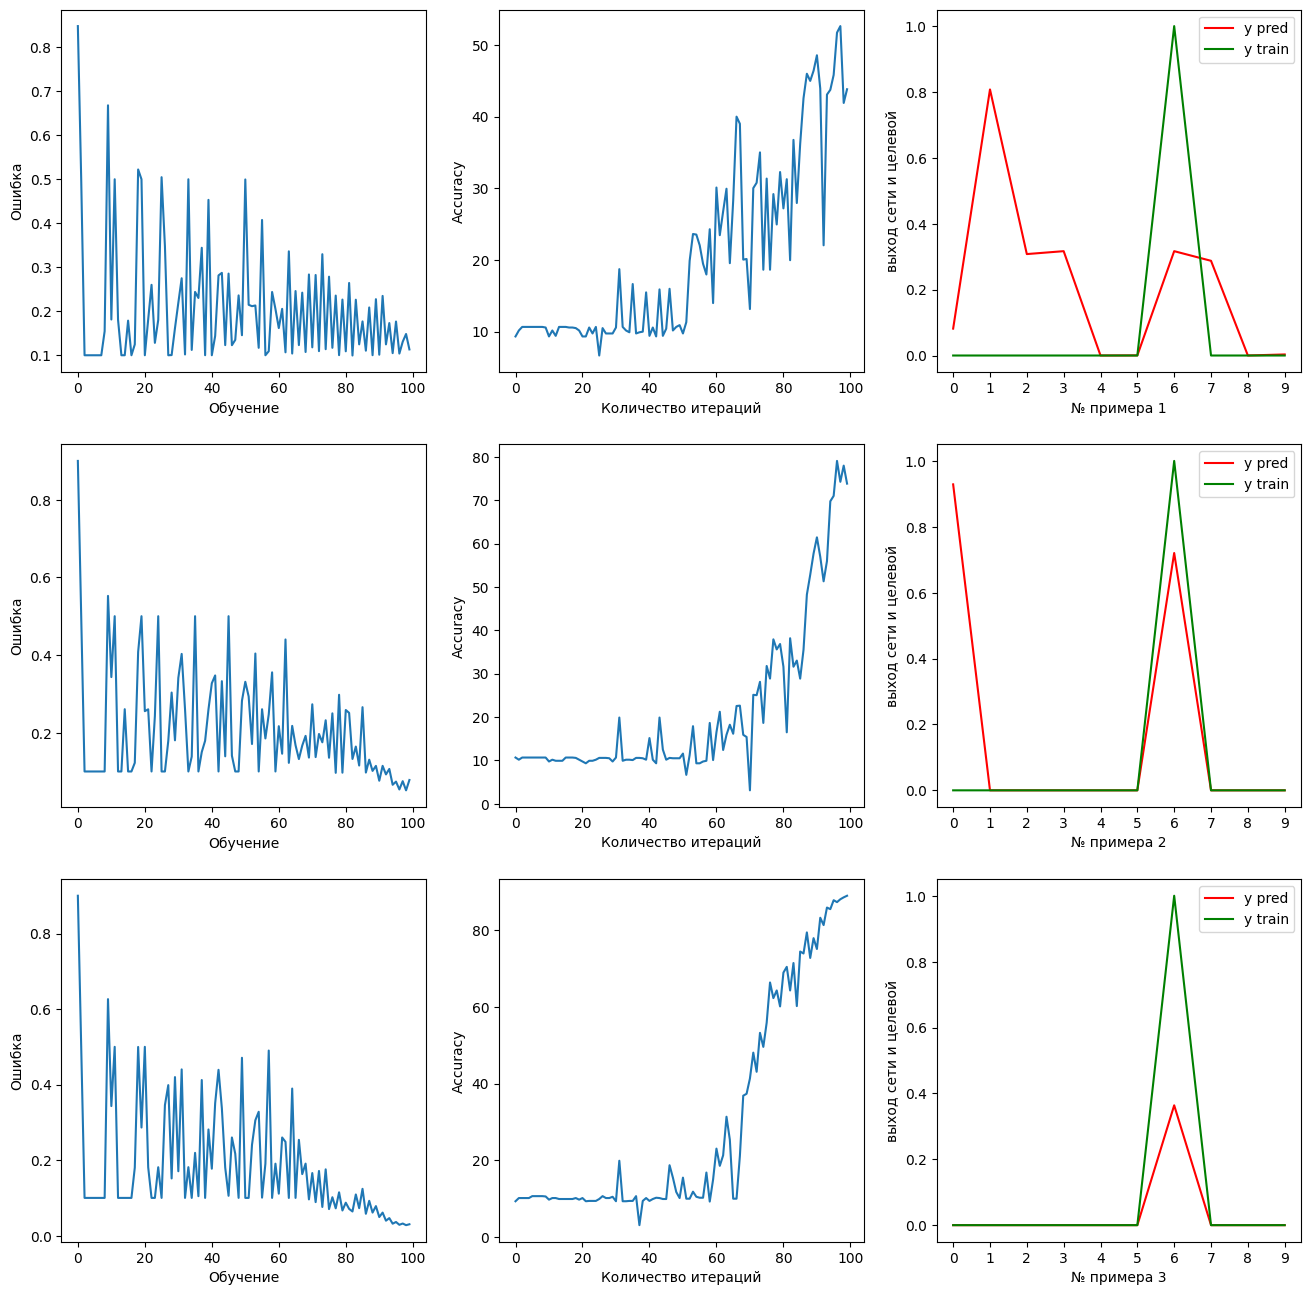

In [11]:
neuron_numb = [5, 20, 60]
count = 0

plt.figure(figsize = (16, 16))
for num, i in enumerate(neuron_numb):

    count += 1
    result = train_model(neuron_numb=i, learning_rate=0.1, num_epochs=100)
    plt.subplot(3, 3, count)
    plt.plot(result['errors'])
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')

    count += 1
    plt.subplot(3,3,count)
    plt.plot(result['metrics'])
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')

    count += 1
    N = 10
    label = 2
    plt.subplot(3,3,count)
    plt.plot(result['layer2'][:N, label], 'r', label='y pred')
    plt.plot(y_train[:N, label],'g', label='y train')
    plt.xticks(np.arange(N))
    plt.xlabel(f'№ примера {num+1}')
    plt.ylabel('выход сети и целевой')
    plt.legend()
            
    print(f"при neuron_numb {i} accuracy на обучении = {round(result['accuracy'], 2)}%")

plt.show()

При увеличении параметра neuron_numb (кол-во нейронов скрытого слоя) ошибка сокращается и точность модели повышается.

при num_epochs 50 accuracy на обучении = 10.47%
при num_epochs 100 accuracy на обучении = 73.82%
при num_epochs 200 accuracy на обучении = 91.19%


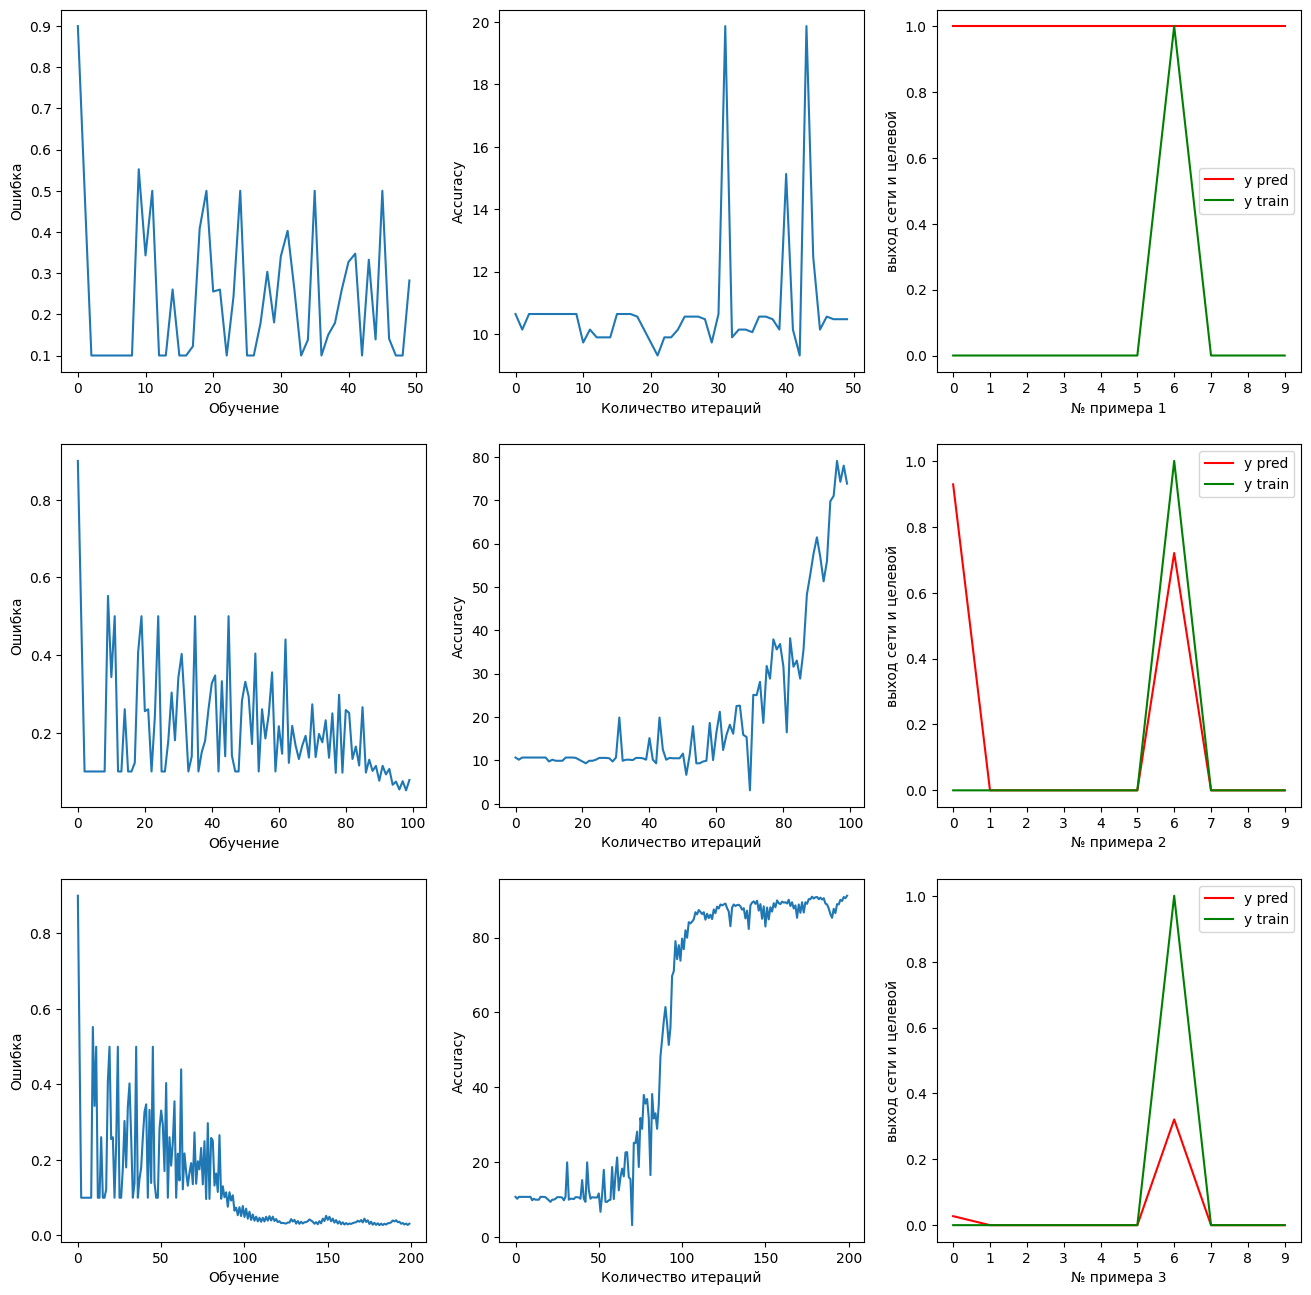

In [12]:
num_epochs = [50, 100, 200]
count = 0

plt.figure(figsize = (16, 16))
for num, i in enumerate(num_epochs):

    count += 1
    result = train_model(neuron_numb=20, learning_rate=0.1, num_epochs=i)
    plt.subplot(3, 3, count)
    plt.plot(result['errors'])
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')

    count += 1
    plt.subplot(3,3,count)
    plt.plot(result['metrics'])
    plt.xlabel('Количество итераций')
    plt.ylabel('Accuracy')

    count += 1
    N = 10
    label = 2
    plt.subplot(3,3,count)
    plt.plot(result['layer2'][:N, label], 'r', label='y pred')
    plt.plot(y_train[:N, label],'g', label='y train')
    plt.xticks(np.arange(N))
    plt.xlabel(f'№ примера {num+1}')
    plt.ylabel('выход сети и целевой')
    plt.legend()
            
    print(f"при num_epochs {i} accuracy на обучении = {round(result['accuracy'], 2)}%")

plt.show()

Увеличение количества итераций также приводит к улучшению качества модели до определенного момента (примерно 120 итераций), затем рост итераций не сильно влияет на модель.